# Machine Learning Python Exercise 2.2: Regularized Logistic regression

In [1]:
import math
import numpy as np # linear algebra
from numpy import loadtxt, where
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data plotting
import numpy.matlib
from scipy.stats import logistic # sigmoid function
import scipy.optimize as opt
from sklearn.preprocessing import PolynomialFeatures # import function to add polynomial features

import os
print(os.listdir("../ex2"))

['.ipynb_checkpoints', 'Coursera_MachineLearningPython_ex2.zip', 'ex2data1.txt', 'ex2data2.txt', 'ex2_part_1.ipynb', 'Ex2_part_2_reg.ipynb', 'Old stuff']


## Instructions

This file  contains code that helps you get started on the exercise. You will need to complete functions in this exericse. The instructions can be found in this notebook, which will load the program as you complete the exercises. If you need to change the code in a certain section, it will be clearly indicated.

In [2]:
# Loading data
data = np.array(pd.read_csv('ex2data2.txt', sep=",", header=None)) # import data
X = data[:,0:2].reshape((118,2))   # initialize data X in 118x2 array
y = data[:,2].reshape((118,1))     # initialize data y in 118x1 array

### Copy your plotData section here, but change plt.xlabel('Exam 1 score') to plt.xlabel('Microchip Test 1') and change plt.ylabel('Profit in 10,000s') to plt.ylabel('Microchip Test 2'). Also add plt.legend(['y=1'], ['y=2'])

In [3]:
# Predefined function because python does not have a find() that Matlab has
def indices(a, func):
    return [i for (i, val) in enumerate(a) if func(val)]

def plotData(x,y):                               # define function to reference later
    ## Your code

    # Correct answer:
    pos = indices(y, lambda y: y > 0)  # filter the positive results (y = 1)
    neg = indices(y, lambda y: y == 0) # filter the negative results (y = 0)

    plt.scatter(X[pos,0], X[pos,1], color = 'k', marker = '+') # set plotting parameters (colour=red, marker=cross)
    plt.scatter(X[neg,0], X[neg,1], color = 'y', marker = 'o') # set plotting parameters (colour=red, marker=cross)
    plt.xlabel('Microchip Test 1')  # set the x-axis label
    plt.ylabel('Microchip Test 2')             # set the y-axis label
    plt.legend(['y=1', 'y=0'])
    plt.show()                                   # plot the data

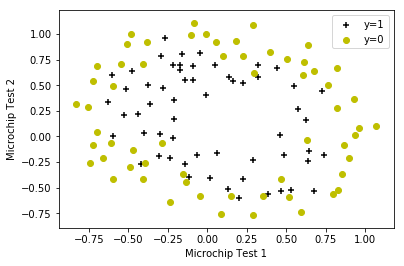

In [4]:
# Plotting data
plotData(X,y)

### Feature mapping
This function maps the two input features to quadratic features used in the regularization exercise. It returns a new feature array with more features, comprising of $X1 = X[:,0]; X2 = X[:,1]$
$X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2$, etc.. depending on the number of degrees.

In [5]:
def mapFeature(X):
    degree = 6 # number of polynomial degrees
    poly = PolynomialFeatures(degree)
    X = poly.fit_transform(X)
    
    return X

### Complete this costFunctionReg file:
Compute cost computes and gradient for logistic regression.

Instructions: Compute the cost of a particular choice of theta. Compute the partial derivatives to calculate grad, which should have the same dimensions as theta.

In [6]:
# Initialize some useful values
m = len(y) # number of training examples

def costFunctionReg(theta, X, y, lambda_var):        # define function to reference later
    grad = np.zeros((theta.shape)) # initiate grad as an array
    reg = 0 # initiate reg value
    ## Your code
    
    # correct answer
    z = np.dot(X,theta) # X * theta
    h = logistic.cdf(z) # sigmoid(X*theta)
    
    n = X.shape[1] # define how many thetas need to be regularized
    
    for j in range(1,n): # calculate the regularization value
        reg = reg + lambda_var/(2*m)*theta[j]**2 # regularization piece of 
                                                # function
        
    J = 1/m * (np.dot((-y).conj().T, np.log(h))-np.dot((1-y).conj().T,np.log(1-h))) + reg
    # 1/m * (-y'*log(h)-(1-y)'*log(1-h)) + regularization
    
    gr = np.zeros((n,1)) # initiate the gradient regularization part
    
    for j in range(1,n):
        gr[j] = lambda_var/m*theta[j]
    
    grad = 1/m * np.dot(X.T,(h-y)) + gr # 1/m * X' * (h-y) + gr'
    return J, grad

## Part 1: Regularized Logistic Regression

In this part, you are given a dataset with data points that are not linearly separable. However, you would still like to use logistic regression to classify the data points.

To do so, you introduce more features to use -- in particular, you add polynomial features to our data matrix (similar to polynomial regression).

In [7]:
# Note that mapFeature also adds a column of ones for us, so the intercept
# term is handled
X = mapFeature(X) # Call the mapFeature function to return a 118x28 matrix of
                    # features in X and added polynomial features

# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1)) # initialize theta as zeros as 28x1

# Set regularization parameter lambda to 1, lambda_var is used for notation as
# lambda has a defined meaning in python
lambda_var = 0 # meaning no regularization when this value is used

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = costFunctionReg(initial_theta, X, y, lambda_var)
grad = grad.flatten(order='F') # flatten in column major

print('Cost at initial theta (zeros): %f \n' % cost)
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros) - first five values only:\n')
print(' %f \n %f \n %f \n %f \n %f \n ' % (grad[0], grad[1], grad[2], grad[3], grad[4]))    # Maybe needs to be changed to grad[0], grad[1]..    
print('Expected gradients (approx) - first five values only:\n')
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n')

# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones((X.shape[1],1)) # initialize theta as zeros as 28x1
cost, grad = costFunctionReg(test_theta, X, y, 10) # call the cost function
grad = grad.flatten(order='F') # flatten in column major

print('\nCost at test theta (with lambda = 10): %f \n' % cost)
print('Expected cost (approx): 3.16\n')
print('Gradient at test theta - first five values only:\n')
print(' %f \n %f \n %f \n %f \n %f \n ' % (grad[0], grad[1], grad[2], grad[3], grad[4]))    # Maybe needs to be changed to grad[0], grad[1]..    
print('Expected gradients (approx) - first five values only:\n')
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n')


Cost at initial theta (zeros): 0.693147 

Expected cost (approx): 0.693

Gradient at initial theta (zeros) - first five values only:

 0.008475 
 0.018788 
 0.000078 
 0.050345 
 0.011501 
 
Expected gradients (approx) - first five values only:

 0.0085
 0.0188
 0.0001
 0.0503
 0.0115


Cost at test theta (with lambda = 10): 3.164509 

Expected cost (approx): 3.16

Gradient at test theta - first five values only:

 0.346045 
 0.161352 
 0.194796 
 0.226863 
 0.092186 
 
Expected gradients (approx) - first five values only:

 0.3460
 0.1614
 0.1948
 0.2269
 0.0922



### plotDecisionBoundary DOES NOT WORK (Probably just delete it, I included it here if you want to try it yourself)

In [8]:
#from sklearn.neighbors.classification import KNeighborsClassifier
#from sklearn.datasets.base import load_iris
#from sklearn.manifold.t_sne import TSNE
#from sklearn.linear_model.logistic import LogisticRegression

#pos = indices(y, lambda y: y > 0)  # filter the positive results (y = 1)
#neg = indices(y, lambda y: y == 0) # filter the negative results (y = 0)

#plt.scatter((data[:,0:2])[pos,0], (data[:,0:2])[pos,1], label='Admitted', 
#            color = 'k', marker = '+') # set plotting parameters 
#plt.scatter((data[:,0:2])[neg,0], (data[:,0:2])[neg,1], label='Not admitted',
#            color = 'y', marker = 'o')  # set plotting parameters (colour=red, 
                                        # marker=cross)

#resolution = 100 # 100x100 background pixels
#X2d_xmin, X2d_xmax  = [min(X[:,1]), max(X[:,1])] # determine x-coordinates of boundary

#X2d_ymin, X2d_ymax  = [min(y), max(y)] # determine y-coordinates
                                                    # of boundary
#xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

#background_model = KNeighborsClassifier(n_neighbors=1).fit(X, p) 
#voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
#voronoiBackground = voronoiBackground.reshape((resolution, resolution))

#plot
#plt.contourf(xx, yy, voronoiBackground)

#plt.xlabel('Microchip Test 1')  # set the x-axis label
#plt.ylabel('Microchip Test 2')             # set the y-axis label
#plt.legend(['y=1', 'y=0'])
#plt.show()                                   # plot the data

# Part 2: Regularization and Accuracies

### Optional Exercise:
In this part, you will get to try different values of lambda and see how regularization affects the decision boundary.

Try the following values of lambda (0, 1, 10, 100).

How does the decision boundary change when you vary lambda? How does the training set accuracy vary?

In [9]:
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1)) # initialize theta as zeros

# Set regularization parameter lambda to 1 (you should vary this)
lambda_var = 1

# These functions are created so the opt.fmin_tnc can be ran
# Optimise
def costReg(theta, X, y, lambda_var):
    theta = np.matrix(theta) # transform all the arrays to matrices for compatibility
    if theta.shape[0] < theta.shape[1]:
        theta = theta.T
    X = np.matrix(X)
    y = np.matrix(y)
    grad = np.zeros((theta.shape))
    reg = 0
    ## Your code
    
    # correct answer
    z = np.dot(X,theta) # X * theta
    h = logistic.cdf(z) # sigmoid(X*theta)
    
    n = X.shape[1] # define how many thetas need to be regularized
    
    for j in range(1,n): # calculate the regularization value
        reg = reg + lambda_var/(2*m)*theta[j]**2
    
    J = 1/m * (np.dot((-y).conj().T, np.log(h))-np.dot((1-y).conj().T,np.log(1-h))) + reg
    # 1/m * (-y'*log(h)-(1-y)'*log(1-h)) + regularization
    return J

def gradientReg(theta, X, y, lambda_var):
    theta = np.matrix(theta) # transform all arrays to matrices for compatibility
    X = np.matrix(X)
    y = np.matrix(y)
        
    if theta.shape[0] < theta.shape[1]:
        theta = theta.T
    n = X.shape[1] # define how many thetas need to be regularized
    z = np.dot(X,theta) # X * theta
    h = logistic.cdf(z) # sigmoid(X*theta)
    
    gr = np.zeros((n,1))
    gr[0] = 0
    
    for j in range(1,n):
        gr[j] = lambda_var/m*theta[j]
    
    grad = 1/m * np.dot(X.T,(h-y)) + gr # 1/m * X' * (h-y) + gr'
    return grad
    
result2 = opt.fmin_tnc(func=costReg, x0=initial_theta, fprime=gradientReg, args=(X, y,lambda_var)) # function to optimise

theta = np.array((result2[0])) # put the updated optimised thetas in theta
theta = theta.reshape(len(theta),1) # make sure theta is a 28x1 array

### Copy your predict file from the previous notebook

In [10]:
# Initialize some useful values
m = len(y) # number of training examples

p = np.zeros((m,1)) # initialize the p array with zeros

def predict(theta, X):        # define function to reference later
    ## Your code
    
    # correct answer
    z = np.dot(X,theta) # X*theta
    h = logistic.cdf(z) # sigmoid(z)
    
    for i in range(m):
        if h[i] >= 0.5: # threshold is set at 0.5
            p[i] = 1 # only positive predictions are changed to 1
    
    return p

#### Compute accuracy on our training set

In [11]:
p = predict(theta,X)

def accuracy_score_new(y_pred, y_true):
    matched = 0 # initialize number of correct answers
    for y_p, y_t in zip(y_pred, y_true): # loop over all predicted and real values
        if y_t in y_p:
            matched = matched + 1 # add 1 to for each correctly predicted answer

    return (matched / len(y_true)) * 100 # returns the number of correct answers divided 
                                            # by number of total predictions * 100

accuracy = accuracy_score_new(p,y)

# of right predictions/accuracy
print('Train Accuracy: %f' % accuracy, '%')

Train Accuracy: 83.050847 %
